In [1]:
from IPython.display import HTML

In [2]:
HTML(
    '''
    <script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <a href="javascript:code_toggle()">TOGGLE CODE ON/OFF</a>
    '''
)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Aim of notebook**:  
Run ME filters from Kiani's lab on dots stimulus from my dots_db module.

**Theoretical steps:**  
1. import dots_db and Kiani's ME modules
2. extract a trial from the db
3. create ME filters
4. apply filters to stimulus 
5. display ME

In [3]:
import sys
# add location of modules to path
sys.path.insert(0,'../modules/')
sys.path.insert(0,'../modules/dots_db/dotsDB/')
# add location of data to path
# sys.path.insert(0,'../../data/')
# sys.path.insert(0,'../modules/dots_db/data/')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
import h5py
import dotsDB as ddb
import motionenergy as kiani_me
import stimulus as stim
import ME_functions as my_me

In [5]:
# plotting options
%matplotlib inline
TITLE_FS = 22
AXES_FS = 22

plt.rcParams.update({'font.size': AXES_FS}) # font size on axes
plt.subplots_adjust(wspace=0.5) # horizontal space between panels

<Figure size 432x288 with 0 Axes>

Step 1 completed by now.

In [6]:
def list_group_names_in_dots_db(path_to_file):
    """
    Lists 1st level group names in hdf5 file
    This function opens the hdf5 in read-only mode and then closes it (context manager is used)
    
    :param path_to_file: string with absolute path to hdf5 file
    :return: list of strings representing group names
    """
    list_of_group_names = []
    with h5py.File(file_path, 'r') as f:
        for g in f:
            list_of_group_names.append(g)
    return list_of_group_names

In [7]:
file_path = '../modules/dots_db/data/test.h5'
L = list_group_names_in_dots_db(file_path)
print(L)

['intlv3_lftTrue_fr60_fs1.1_sp5_ds90_c50_cs10_dleft_nf6_dm5_sc2.5_ppd55.4612_dts6_fw305']


In [8]:
# let's get the group name of the first group
gname = L[0]

In [9]:
def extract_trial_as_3d_array(path_to_file, group_name, trial_number):
    """
    extracts a specific trial from the database and returns it as a 3D matrix of pixel frames
    Uses context manager to open the file in read-only mode
    
    :param path_to_file: string with absolute path to hdf5 file
    :param group_name: string for name of group in hdf5 file
    :param trial_number: number for the trial to extract
    :return: 3D numpy array, first two dims for pixels, last dim for frames
    """
    with h5py.File(path_to_file, 'r') as f:
        g = f[group_name]
        s = g['px']
        npx = g.attrs['frame_width_in_pxs']
        nf = g.attrs['num_frames']
#         fr = g.attrs['frame_rate']
        trial = s[trial_number-1,:]
    return trial.reshape((npx, npx, nf), order="F")

In [10]:
trial = extract_trial_as_3d_array(file_path, gname, 1)

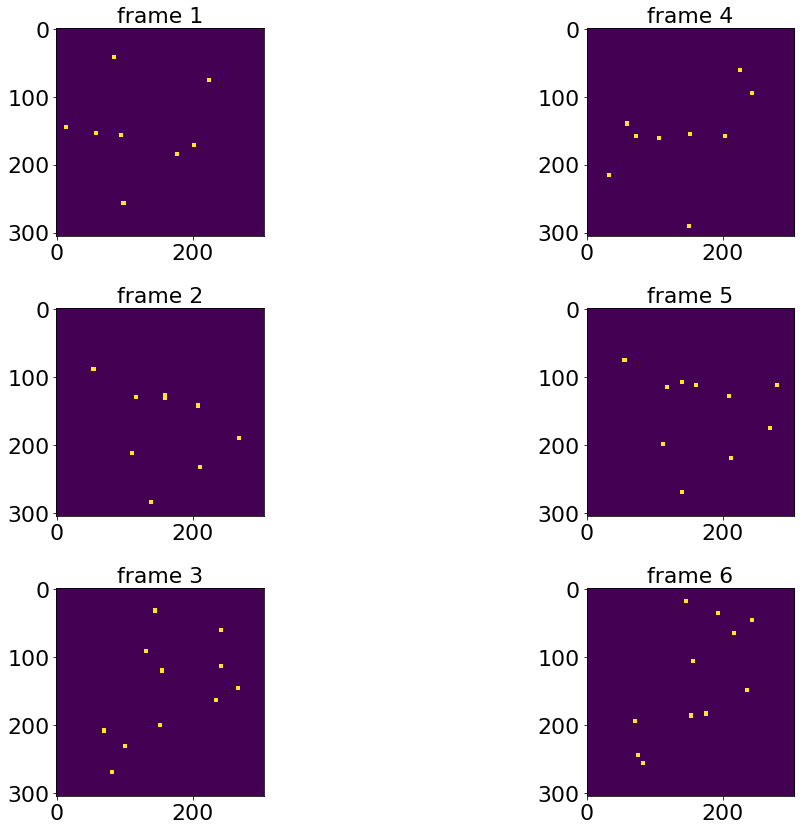

In [11]:
plt.rcParams["figure.figsize"] = (18, 12) # (w, h) # figure size 
fig, axs = plt.subplots(3, 2)

# the following dict conveniently maps frame number to subplot indices,
# in order to display two frames next to each other whenever one is the 'successor' from the other
# i.e., frames 1 and 4 together, then 2 and 5, etc.
frame_to_subplot = {
    0: (0, 0),
    3: (0, 1),
    1: (1, 0),
    4: (1, 1),
    2: (2, 0),
    5: (2, 1)
}

for frame in range(trial.shape[2]):
    subplot_idx = frame_to_subplot[frame]
    axs[subplot_idx].imshow(trial[:,:,frame])
#     axs[1, 1].set_aspect('equal', 'box')
    axs[subplot_idx].set_title(f"frame {frame + 1}", fontsize=TITLE_FS)

fig.tight_layout()

# plt.show()

Step 2 completed by now